In [2]:
using Pkg
Pkg.add("AlphaVantage")

   Updating registry at `C:\Users\djc20\.julia\registries\General`
  Resolving package versions...
  Installed HttpCommon ─── v0.5.0
  Installed ArgCheck ───── v2.1.0
  Installed Nullables ──── v1.0.0
  Installed URIParser ──── v0.4.1
  Installed AlphaVantage ─ v0.2.0
Updating `C:\Users\djc20\.julia\environments\v1.5\Project.toml`
  [6348297c] + AlphaVantage v0.2.0
Updating `C:\Users\djc20\.julia\environments\v1.5\Manifest.toml`
  [6348297c] + AlphaVantage v0.2.0
  [dce04be8] + ArgCheck v2.1.0
  [77172c1b] + HttpCommon v0.5.0
  [4d1e1d77] + Nullables v1.0.0
  [30578b45] + URIParser v0.4.1


In [3]:
Pkg.add("DataFrames")
Pkg.add("DataFramesMeta")
Pkg.add("Dates")

  Resolving package versions...
No Changes to `C:\Users\djc20\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\djc20\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
  Installed DataFramesMeta ─ v0.5.1
Updating `C:\Users\djc20\.julia\environments\v1.5\Project.toml`
  [1313f7d8] + DataFramesMeta v0.5.1
Updating `C:\Users\djc20\.julia\environments\v1.5\Manifest.toml`
  [1313f7d8] + DataFramesMeta v0.5.1
  Resolving package versions...
Updating `C:\Users\djc20\.julia\environments\v1.5\Project.toml`
  [ade2ca70] + Dates
No Changes to `C:\Users\djc20\.julia\environments\v1.5\Manifest.toml`


In [1]:
using AlphaVantage
using DataFrames
using DataFramesMeta
using Dates
using Plots

┌ Warning: No API key found
└ @ AlphaVantage C:\Users\djc20\.julia\packages\AlphaVantage\DpiOf\src\AlphaVantage.jl:15


In [2]:
stock_list = ["FB","TWTR", "AMZN", "EBAY", "UBER", "LYFT", "NFLX", "SPOT"]; #Facebook, Twitter, Amazon, eBay, Uber, Lyft, Netflix, Spotify
#http://dm13450.github.io/2020/07/05/AlphaVantage.html

In [3]:
function raw_to_dataframe(rawData)
    df = DataFrame(rawData[1])
    dfNames = Symbol.(vcat(rawData[2]...))
    df = rename(df, dfNames)

    df.Date = Date.(df.timestamp)#Dates.Year(2020),Dates.Month(1),Dates.Day(1))#df.timestamp)
    for x in (:open, :high, :low, :close, :adjusted_close, :dividend_amount)
        df[!, x] = Float64.(df[!, x])
    end 
    df.volume = Int64.(df.volume)
    return df
end

function intra_to_dataframe(rawData)
    df = DataFrame(rawData[1])
    dfNames = Symbol.(vcat(rawData[2]...))
    df = rename(df, dfNames)

    df.DateTime = DateTime.(df.timestamp, "yyyy-mm-dd HH:MM:SS")
    for x in (:open, :high, :low, :close)
        df[!, x] = Float64.(df[!, x])
    end 
    df.volume = Int64.(df.volume)
    return df
end

intra_to_dataframe (generic function with 1 method)

In [4]:
ENV["ALPHA_VANTAGE_API_KEY"]  = "LQDT1B55FKZ195J3"

FBRaw = AlphaVantage.time_series_daily_adjusted("FB", outputsize="full", datatype="csv")
FB = raw_to_dataframe(FBRaw)
FB[!, :timestamp] = Dates.Date.(FB[!, :timestamp]);
FB

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount
,Date,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,2020-10-29,276.55,283.6,273.78,280.83,280.83,30123221,0.0
2,2020-10-28,278.79,278.79,267.26,267.67,267.67,23121808,0.0
3,2020-10-27,278.76,284.51,276.31,283.29,283.29,16287249,0.0
4,2020-10-26,283.16,285.23,274.26,277.11,277.11,21322925,0.0
5,2020-10-23,278.802,285.24,276.82,284.79,284.79,17535155,0.0
6,2020-10-22,279.87,282.45,275.04,278.12,278.12,16720026,0.0
7,2020-10-21,279.56,283.05,276.37,278.73,278.73,28998638,0.0
8,2020-10-20,263.06,269.7,262.88,267.56,267.56,18763246,0.0
9,2020-10-19,265.53,268.55,259.88,261.4,261.4,13586955,0.0


In [5]:
dt = Date(2020,1,01)
fb20 = FB.timestamp .>= dt
df = FB[fb20,:]

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount
,Date,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,2020-10-29,276.55,283.6,273.78,280.83,280.83,30123221,0.0
2,2020-10-28,278.79,278.79,267.26,267.67,267.67,23121808,0.0
3,2020-10-27,278.76,284.51,276.31,283.29,283.29,16287249,0.0
4,2020-10-26,283.16,285.23,274.26,277.11,277.11,21322925,0.0
5,2020-10-23,278.802,285.24,276.82,284.79,284.79,17535155,0.0
6,2020-10-22,279.87,282.45,275.04,278.12,278.12,16720026,0.0
7,2020-10-21,279.56,283.05,276.37,278.73,278.73,28998638,0.0
8,2020-10-20,263.06,269.7,262.88,267.56,267.56,18763246,0.0
9,2020-10-19,265.53,268.55,259.88,261.4,261.4,13586955,0.0


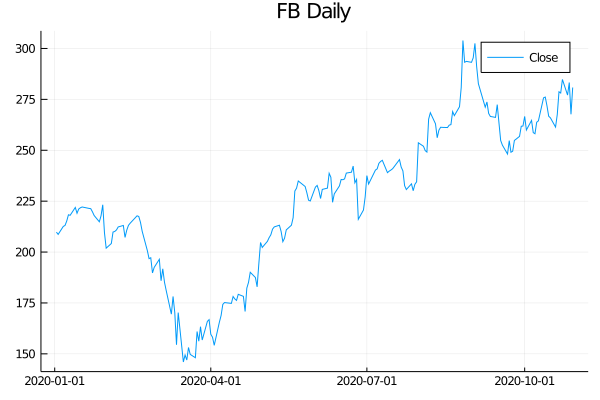

In [6]:
plot(df.Date, df.close, label="Close", title="FB Daily")